# STAN47 Lab 3: Fully Connected Neural Networks and Hyperparameters
* Instructors: [Małgorzata Bogdan](https://portal.research.lu.se/sv/persons/malgorzata-bogdan), [Hanqing Wu](https://portal.research.lu.se/en/persons/hanqing-wu)

## Fully-Connected Neural Networks, continued

Let us continue our analysis of the Fashion-MNIST dataset using fully connected neural networks in the second lab session.

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'  ## To turn off debugging information 

import tensorflow as tf
import time
%matplotlib inline

In [40]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [41]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


x_train = x_train.astype('float32') /255. # normalization
x_test = x_test.astype('float32') /255.

### Task 1

Design **three different** fully-connected neural networks with **different network structures** (the number of nodes, layers, the type of the activation function, etc). Train/test these neural network using the Fashion-MNIST data. 

You can use the "pipeline" function, which gives you a compiled model with your design. Note that you don't have to use this function. It is only to make your job easier.

In [42]:
def pipeline(inp_dim,
            n_nod,
            act_fun = 'relu',
            out_act_fun = 'sigmoid',
            opt_method = 'SGD',
            cost_fun = 'binary_crossentropy',
            lr_rate = 1e-2, 
            lambd = 0.0, 
            num_out = None):
    """
    * act_fun: the activation function. Most common are
        * 'linear'
        * 'relu'
        * 'tanh'
        * 'sigmoid'
        
    * out_act_fun: the activation function for the output nodes. Most common are
        * 'linear'
        * 'sigmoid'
        * 'softmax'
        
    * opt_method: The error minimization method. Common choices
        * 'SGD'
        * 'Adam'
        * 'RMSprop'
        
    * cost_fun: The error function used during training. There are three common ones
        * 'mean_squared_error'
        * 'binary_crossentropy'
        * 'categorical_crossentropy'
    
    * lr_rate: The learning rate. 
    
    * lambd: L2 regularization parameter
    
    * num_out: The number of output nodes
"""
    
    
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    
    for i,node in enumerate(n_nod):
         model.add(tf.keras.layers.Dense(node, activation = act_fun,
                  kernel_regularizer=tf.keras.regularizers.l2(lambd)))
    model.add(tf.keras.layers.Dense(num_out, activation = out_act_fun ))
    
    method = getattr(tf.keras.optimizers.legacy, opt_method)
    
    model.compile(optimizer = method(learning_rate = lr_rate),
                  loss = cost_fun,
                  metrics=['accuracy'])   
    
    return model

We could use cross-validation to find out the model with the best performance.

In [10]:
# Define three different models configurations
model_configs = [
    # Configuration for model 1
    {
        "n_nod": [64, 32],
        "act_fun": 'relu',
        "out_act_fun": 'softmax',
        "opt_method": 'SGD',
        "cost_fun": 'categorical_crossentropy',
        "num_out": 10
    },
    # Configuration for model 2
    {
        "n_nod": [128, 64, 32],
        "act_fun": 'tanh',
        "out_act_fun": 'softmax',
        "opt_method": 'Adam',
        "cost_fun": 'categorical_crossentropy',
        "num_out": 10
    },
    # Configuration for model 3
    {
        "n_nod": [256, 128],
        "act_fun": 'relu',
        "out_act_fun": 'softmax',
        "opt_method": 'RMSprop',
        "cost_fun": 'categorical_crossentropy',
        "num_out": 10
    }
]

# Train and save each model
for i, config in enumerate(model_configs, 1):
    model = pipeline(inp_dim=28, **config)
    print(f"Training Model {i}...")
    model.fit(x_train, y_train, epochs=10, validation_split=0.2)
    print(f"Evaluating Model {i}...")
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print(f'\nModel {i} - Test accuracy: {test_acc:.4f}\n')
    
    # Save the model
    model_path = f'model{i}.h5'  # Save as HDF5 file
    model.save(model_path)
    print(f"Model {i} saved as {model_path}")

Training Model 1...
Epoch 1/10
1500/1500 [==============================] - 1s 689us/step - loss: 0.8382 - accuracy: 0.7285 - val_loss: 0.5579 - val_accuracy: 0.8062
Epoch 2/10
1500/1500 [==============================] - 1s 646us/step - loss: 0.5239 - accuracy: 0.8180 - val_loss: 0.4895 - val_accuracy: 0.8258
Epoch 3/10
1500/1500 [==============================] - 1s 623us/step - loss: 0.4752 - accuracy: 0.8336 - val_loss: 0.4687 - val_accuracy: 0.8355
Epoch 4/10
1500/1500 [==============================] - 1s 639us/step - loss: 0.4489 - accuracy: 0.8430 - val_loss: 0.4547 - val_accuracy: 0.8364
Epoch 5/10
1500/1500 [==============================] - 1s 625us/step - loss: 0.4300 - accuracy: 0.8480 - val_loss: 0.4463 - val_accuracy: 0.8398
Epoch 6/10
1500/1500 [==============================] - 1s 622us/step - loss: 0.4137 - accuracy: 0.8544 - val_loss: 0.4176 - val_accuracy: 0.8520
Epoch 7/10
1500/1500 [==============================] - 1s 629us/step - loss: 0.4025 - accuracy: 0.8579 

/Users/viktorsjoberg/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model 1 saved as model1.h5
Training Model 2...
Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7539 - accuracy: 0.7158 - val_loss: 0.7457 - val_accuracy: 0.7234
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7152 - accuracy: 0.7314 - val_loss: 0.8003 - val_accuracy: 0.7454
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7450 - accuracy: 0.7263 - val_loss: 0.6936 - val_accuracy: 0.7565
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7603 - accuracy: 0.7217 - val_loss: 0.7778 - val_accuracy: 0.7324
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7472 - accuracy: 0.7186 - val_loss: 0.7185 - val_accuracy: 0.7089
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7834 - accuracy: 0.7135 - val_loss: 0.8948 - val_accuracy: 0.7113
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.8475 - accu


Model 2 - Test accuracy: 0.6705

Model 2 saved as model2.h5
Training Model 3...
Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7312 - accuracy: 0.7686 - val_loss: 0.5514 - val_accuracy: 0.8232
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5659 - accuracy: 0.8149 - val_loss: 0.5470 - val_accuracy: 0.7902
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5730 - accuracy: 0.8223 - val_loss: 0.5736 - val_accuracy: 0.8278
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5720 - accuracy: 0.8211 - val_loss: 0.6023 - val_accuracy: 0.8218
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6008 - accuracy: 0.8205 - val_loss: 0.6672 - val_accuracy: 0.8309
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6153 - accuracy: 0.8185 - val_loss: 0.7092 - val_accuracy: 0.8056
Epoch 7/10
1500/1500 [==============================] -

summary 

• Model 1 - Test accuracy: 0.8522 (The best model)

• Model 2 - Test accuracy: 0.6705

• Model 3 - Test accuracy: 0.7245

In [43]:
from tensorflow.keras.models import load_model

# Paths to the saved models
model_paths = ['model1.h5', 'model2.h5', 'model3.h5']

# Load each model
model1 = load_model(model_paths[0])
model2 = load_model(model_paths[1])
model3 = load_model(model_paths[2])

### Task 2

Use the 5-fold cross-validation method to investigate the performance of the networks you designed. Select the one that, based on the performed cross-validation, worked best.

The goal of the above task was to identify a network that potentially has the best performance. However, the actual performance has to be checked on the test data which is not used in the training process. 

In [16]:
from sklearn.model_selection import KFold

# Prepare the cross-validation
kfold = KFold(5, shuffle=True, random_state=42)

# Example of how to train and evaluate one model using K-Fold
def cross_validate_model(model_fn, X, y, folds):
    fold_no = 1
    for train, test in folds.split(X, y):
        model = model_fn  
        print(f'Training model for fold {fold_no}...')
        
        # Train the model
        model.fit(X[train], y[train], batch_size=32, epochs=10, verbose=1)
        
        # Evaluate the model
        scores = model.evaluate(X[test], y[test], verbose=0)
        print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
        fold_no += 1

kfold_model1 = cross_validate_model(model1, x_test, y_test, kfold)
kfold_model2 = cross_validate_model(model2, x_test, y_test, kfold)
kfold_model3 = cross_validate_model(model3, x_test, y_test, kfold)


Training model for fold 1...
Epoch 1/10
250/250 [==============================] - 0s 578us/step - loss: 0.4247 - accuracy: 0.8486
Epoch 2/10
250/250 [==============================] - 0s 538us/step - loss: 0.4114 - accuracy: 0.8555
Epoch 3/10
250/250 [==============================] - 0s 564us/step - loss: 0.4082 - accuracy: 0.8526
Epoch 4/10
250/250 [==============================] - 0s 547us/step - loss: 0.3994 - accuracy: 0.8569
Epoch 5/10
250/250 [==============================] - 0s 539us/step - loss: 0.3900 - accuracy: 0.8576
Epoch 6/10
250/250 [==============================] - 0s 543us/step - loss: 0.3888 - accuracy: 0.8586
Epoch 7/10
250/250 [==============================] - 0s 548us/step - loss: 0.3806 - accuracy: 0.8656
Epoch 8/10
250/250 [==============================] - 0s 552us/step - loss: 0.3770 - accuracy: 0.8608
Epoch 9/10
250/250 [==============================] - 0s 537us/step - loss: 0.3740 - accuracy: 0.8664
Epoch 10/10
250/250 [==============================] 

250/250 [==============================] - 0s 1ms/step - loss: 0.9024 - accuracy: 0.6447
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.9009 - accuracy: 0.6453
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.8871 - accuracy: 0.6555
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.8457 - accuracy: 0.6777
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss: 0.8827 - accuracy: 0.6821
Epoch 9/10
250/250 [==============================] - 0s 1ms/step - loss: 0.8159 - accuracy: 0.7051
Epoch 10/10
250/250 [==============================] - 0s 1ms/step - loss: 0.8318 - accuracy: 0.6836
Score for fold 3: loss of 0.7996468544006348; accuracy of 71.8500018119812%
Training model for fold 4...
Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.8883 - accuracy: 0.6551
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.8401 - accuracy: 0.6845
Epoch

250/250 [==============================] - 0s 2ms/step - loss: 0.7642 - accuracy: 0.7707
Epoch 9/10
250/250 [==============================] - 0s 2ms/step - loss: 0.8933 - accuracy: 0.7592
Epoch 10/10
250/250 [==============================] - 0s 2ms/step - loss: 0.8297 - accuracy: 0.7604
Score for fold 5: loss of 0.7722668051719666; accuracy of 76.39999985694885%


Summary 

• model 1: (The best model)
    Score for fold 5: loss of 0.27527573704719543; accuracy of 90.20000100135803%
    
• model 2:
    Score for fold 5: loss of 0.9062712788581848; accuracy of 67.75000095367432%

• model 3:
    Score for fold 5: loss of 0.7722668051719666; accuracy of 76.39999985694885%

### Task 3

Train the selected networks on the entire training data. Then test its performance on the testing data set and summarize the performance.

In [17]:
model1_new_config = {
    "n_nod": [64, 32],
    "act_fun": 'relu',
    "out_act_fun": 'softmax',
    "opt_method": 'SGD',
    "cost_fun": 'categorical_crossentropy',
    "num_out": 10
}

# Create Model 1 with the specified configuration
model1_new = pipeline(inp_dim=28, **model1_new_config)

# Train Model 1 on the entire training dataset
print("Training model1_new on the entire training dataset...")
model1_new.fit(x_train, y_train, epochs=10)  # Adjust epochs if needed

# Evaluate the model on the testing dataset
print("Evaluating model1_new on the testing dataset...")
test_loss, test_acc = model1_new.evaluate(x_test, y_test, verbose=2)

print(f'\nmodel1_new - Test accuracy: {test_acc:.4f}\n')

# Save the retrained model
model1_new_path = 'model1_new.h5'  # Save as HDF5 file
model1_new.save(model1_new_path)
print(f"model1_new saved as {model1_new_path}")

Training model1_new on the entire training dataset...
Epoch 1/10
1875/1875 [==============================] - 1s 536us/step - loss: 0.8231 - accuracy: 0.7218
Epoch 2/10
1875/1875 [==============================] - 1s 514us/step - loss: 0.5164 - accuracy: 0.8221
Epoch 3/10
1875/1875 [==============================] - 1s 525us/step - loss: 0.4645 - accuracy: 0.8372
Epoch 4/10
1875/1875 [==============================] - 1s 516us/step - loss: 0.4363 - accuracy: 0.8474
Epoch 5/10
1875/1875 [==============================] - 1s 518us/step - loss: 0.4159 - accuracy: 0.8545
Epoch 6/10
1875/1875 [==============================] - 1s 522us/step - loss: 0.3999 - accuracy: 0.8606
Epoch 7/10
1875/1875 [==============================] - 1s 520us/step - loss: 0.3870 - accuracy: 0.8644
Epoch 8/10
1875/1875 [==============================] - 1s 560us/step - loss: 0.3763 - accuracy: 0.8674
Epoch 9/10
1875/1875 [==============================] - 1s 518us/step - loss: 0.3668 - accuracy: 0.8712
Epoch 10/1

/Users/viktorsjoberg/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Hyperparameters

In machine learning, a hyperparameter is a parameter, such as the learning rate or choice of optimizer, which specifies details of the learning process, hence the name hyperparameter. This is in contrast to parameters which determine the model itself.

### Batch Size

In deep learning, batch size is a one of the most important hyperparameter that determines the number of training examples used in one iteration of model training. It is closely related to the computational efficiency, memory use and the convergence speed. However, there does not exist a unversal optimal batch size. The optimal batch size can vary depending on the specific task, model architecture, and available computational resources. Therefore, it’s often determined empirically through experimentation.

To see the effect of different batch sizes. Let us again investigate the Fashion-MNIST dataset.

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'  ## To turn off debugging information 

import tensorflow as tf
import time
%matplotlib inline

In [45]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


x_train = x_train.astype('float32') /255. # regularization
x_test = x_test.astype('float32') /255.

### Task 4

Consider one of the neural network models you have designed in task 1. Holding the model and other parameters the same, try three different `batch_size` when fitting. Compare the accuracy on both the training and test set in these three cases. Report also the time cost for training respectively. You may use the `pipeline` function defined above and the `time` module import above.

In [23]:
from tensorflow.keras.utils import to_categorical
import time

# Model configuration for Model 1
model1_config = {
    "n_nod": [64, 32],
    "act_fun": 'relu',
    "out_act_fun": 'softmax',
    "opt_method": 'SGD',
    "cost_fun": 'categorical_crossentropy',
    "num_out": 10
}

# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize the images
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)  # Convert labels to one-hot encoding


# Define batch sizes for the experiment
batch_sizes = [32, 128, 512]  # Small, Medium, Large
models = {}  # Dictionary to store trained models

for i, batch_size in enumerate(batch_sizes, 1):
    # Create a new instance of Model 1
    model = pipeline(inp_dim=28, **model1_config)
    
    # Measure training time
    start_time = time.time()
    model.fit(x_train, y_train, batch_size=batch_size, epochs=10, verbose=2)
    training_time = time.time() - start_time
    
    # Evaluate the model
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f'Batch Size {batch_size} - Test accuracy: {test_acc:.4f}, Training time: {training_time:.2f} seconds\n')
    
    # Save the model for future use
    model_name = f'model1_bs{i}'
    models[model_name] = model  # Storing the model in the dictionary
    model.save(f'{model_name}.h5')

Epoch 1/10
1875/1875 - 1s - loss: 0.7839 - accuracy: 0.7388 - 1s/epoch - 553us/step
Epoch 2/10
1875/1875 - 1s - loss: 0.5069 - accuracy: 0.8242 - 941ms/epoch - 502us/step
Epoch 3/10
1875/1875 - 1s - loss: 0.4592 - accuracy: 0.8383 - 938ms/epoch - 500us/step
Epoch 4/10
1875/1875 - 1s - loss: 0.4321 - accuracy: 0.8472 - 968ms/epoch - 516us/step
Epoch 5/10
1875/1875 - 1s - loss: 0.4128 - accuracy: 0.8547 - 919ms/epoch - 490us/step
Epoch 6/10
1875/1875 - 1s - loss: 0.3970 - accuracy: 0.8600 - 958ms/epoch - 511us/step
Epoch 7/10
1875/1875 - 1s - loss: 0.3828 - accuracy: 0.8651 - 912ms/epoch - 487us/step
Epoch 8/10
1875/1875 - 1s - loss: 0.3713 - accuracy: 0.8689 - 898ms/epoch - 479us/step
Epoch 9/10
1875/1875 - 1s - loss: 0.3630 - accuracy: 0.8705 - 1s/epoch - 543us/step
Epoch 10/10
1875/1875 - 1s - loss: 0.3523 - accuracy: 0.8749 - 893ms/epoch - 476us/step
Batch Size 32 - Test accuracy: 0.8569, Training time: 9.64 seconds



Epoch 1/10
469/469 - 0s - loss: 1.2069 - accuracy: 0.6200 - 448ms/epoch - 954us/step
Epoch 2/10
469/469 - 0s - loss: 0.7150 - accuracy: 0.7583 - 329ms/epoch - 701us/step
Epoch 3/10
469/469 - 0s - loss: 0.6116 - accuracy: 0.7923 - 320ms/epoch - 683us/step
Epoch 4/10
469/469 - 0s - loss: 0.5595 - accuracy: 0.8092 - 317ms/epoch - 677us/step
Epoch 5/10
469/469 - 0s - loss: 0.5262 - accuracy: 0.8178 - 333ms/epoch - 711us/step
Epoch 6/10
469/469 - 0s - loss: 0.5034 - accuracy: 0.8248 - 318ms/epoch - 677us/step
Epoch 7/10
469/469 - 0s - loss: 0.4866 - accuracy: 0.8296 - 332ms/epoch - 708us/step
Epoch 8/10
469/469 - 0s - loss: 0.4731 - accuracy: 0.8348 - 322ms/epoch - 686us/step
Epoch 9/10
469/469 - 0s - loss: 0.4616 - accuracy: 0.8386 - 315ms/epoch - 672us/step
Epoch 10/10
469/469 - 0s - loss: 0.4518 - accuracy: 0.8422 - 314ms/epoch - 669us/step
Batch Size 128 - Test accuracy: 0.8311, Training time: 3.46 seconds



Epoch 1/10
118/118 - 0s - loss: 1.9466 - accuracy: 0.3602 - 275ms/epoch - 2ms/step
Epoch 2/10
118/118 - 0s - loss: 1.2766 - accuracy: 0.6365 - 151ms/epoch - 1ms/step
Epoch 3/10
118/118 - 0s - loss: 0.9748 - accuracy: 0.6991 - 155ms/epoch - 1ms/step
Epoch 4/10
118/118 - 0s - loss: 0.8380 - accuracy: 0.7338 - 154ms/epoch - 1ms/step
Epoch 5/10
118/118 - 0s - loss: 0.7587 - accuracy: 0.7534 - 159ms/epoch - 1ms/step
Epoch 6/10
118/118 - 0s - loss: 0.7065 - accuracy: 0.7677 - 157ms/epoch - 1ms/step
Epoch 7/10
118/118 - 0s - loss: 0.6679 - accuracy: 0.7789 - 155ms/epoch - 1ms/step
Epoch 8/10
118/118 - 0s - loss: 0.6385 - accuracy: 0.7868 - 158ms/epoch - 1ms/step
Epoch 9/10
118/118 - 0s - loss: 0.6142 - accuracy: 0.7948 - 152ms/epoch - 1ms/step
Epoch 10/10
118/118 - 0s - loss: 0.5948 - accuracy: 0.8002 - 173ms/epoch - 1ms/step
Batch Size 512 - Test accuracy: 0.7896, Training time: 1.81 seconds



Summary

• Batch Size 32: Test accuracy: 0.8569, Training time: 9.64 seconds (best accuracy)

• Batch Size 128: Test accuracy: 0.8311, Training time: 3.46 seconds

• Batch Size 512: Test accuracy: 0.7896, Training time: 1.81 seconds (fastest) 

The experiment involving training three identical neural networks with varying batch sizes on the same dataset has yielded insightful outcomes. When utilizing a smaller batch size of 32, the network achieved the highest test accuracy of 0.8569, albeit at a longer training time of 9.64 seconds. This suggests that smaller batch sizes may provide a more refined update to the model's weights per iteration, potentially leading to better generalization on the test dataset. Conversely, as the batch size increased to 128 and then to 512, there was a noticeable decrease in test accuracy, with values dropping to 0.8311 and 0.7896, respectively. However, these larger batch sizes significantly reduced the training time, with the largest batch size of 512 being the fastest at 1.81 seconds. This trade-off highlights a critical aspect of neural network training: smaller batch sizes tend to yield higher accuracy by allowing more granular updates to the model's parameters, but at the cost of increased computational time. On the other hand, larger batch sizes offer computational efficiency and speed, though they may result in less precise weight updates, potentially leading to lower model accuracy. This experiment underscores the importance of carefully selecting the batch size as a hyperparameter, balancing between training efficiency and model performance.

### Optimizers

Optimizers also play a crucial rule in deep learning. The choice of an appropriate optimizer for a deep learning model is important as it can greatly impact the performance of the model. To see the effect of choosing different optimizers, we have the following task:

### Task 5

Consider one of the neural network models you have designed in task 1. Holding the model and other parameters the same, try the following three different optimizers when fitting:
* SGD -- Stochastic Gradient Descent
* Adam -- the Adaptive Moment Estimation optimizer
* RMSprop -- Root Mean Squared Propagation

Compare the accuracy on both the training and test set in these three cases. Report also the time cost for training respectively. Which one of the methods is the fastest with your setup? Does the fastest method also leads to the highest accuracy? You may use the `pipeline` function defined above and the `time` module import above.

In [25]:
# List of optimizers to try
optimizers = ['SGD', 'Adam', 'RMSprop']
models_results = {}

for i, opt in enumerate(optimizers, 1):
    print(f"\nTraining Model 1 with {opt} optimizer...")
    # Update model configuration with the current optimizer
    model_config = model1_config.copy()
    model_config['opt_method'] = opt

    # Create model
    model = pipeline(inp_dim=28, **model_config)

    # Measure training time
    start_time = time.time()
    model.fit(x_train, y_train, epochs=10, verbose=2)
    training_time = time.time() - start_time

    # Evaluate the model
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

    # Store results
    models_results[f'model1_opt{i}'] = {
        'Optimizer': opt,
        'Test Accuracy': test_acc,
        'Training Time': training_time
    }

    print(f"Model 1 with {opt} - Test accuracy: {test_acc:.4f}, Training time: {training_time:.2f} seconds")

# Summarize the results
for name, result in models_results.items():
    print(f"\n{name} - Optimizer: {result['Optimizer']}, Test Accuracy: {result['Test Accuracy']:.4f}, Training Time: {result['Training Time']:.2f} seconds")


Training Model 1 with SGD optimizer...
Epoch 1/10
1875/1875 - 1s - loss: 0.7919 - accuracy: 0.7382 - 1s/epoch - 588us/step
Epoch 2/10
1875/1875 - 1s - loss: 0.5095 - accuracy: 0.8231 - 967ms/epoch - 516us/step
Epoch 3/10
1875/1875 - 1s - loss: 0.4586 - accuracy: 0.8400 - 963ms/epoch - 513us/step
Epoch 4/10
1875/1875 - 1s - loss: 0.4301 - accuracy: 0.8500 - 965ms/epoch - 515us/step
Epoch 5/10
1875/1875 - 1s - loss: 0.4093 - accuracy: 0.8562 - 961ms/epoch - 513us/step
Epoch 6/10
1875/1875 - 1s - loss: 0.3961 - accuracy: 0.8608 - 962ms/epoch - 513us/step
Epoch 7/10
1875/1875 - 1s - loss: 0.3827 - accuracy: 0.8650 - 959ms/epoch - 512us/step
Epoch 8/10
1875/1875 - 1s - loss: 0.3725 - accuracy: 0.8677 - 960ms/epoch - 512us/step
Epoch 9/10
1875/1875 - 1s - loss: 0.3637 - accuracy: 0.8708 - 965ms/epoch - 515us/step
Epoch 10/10
1875/1875 - 1s - loss: 0.3545 - accuracy: 0.8748 - 964ms/epoch - 514us/step
313/313 - 0s - loss: 0.3876 - accuracy: 0.8610 - 163ms/epoch - 522us/step


Model 1 with SGD - Test accuracy: 0.8610, Training time: 9.95 seconds

Training Model 1 with Adam optimizer...
Epoch 1/10
1875/1875 - 1s - loss: 0.5464 - accuracy: 0.8034 - 1s/epoch - 737us/step
Epoch 2/10
1875/1875 - 1s - loss: 0.4383 - accuracy: 0.8414 - 1s/epoch - 650us/step
Epoch 3/10
1875/1875 - 1s - loss: 0.4213 - accuracy: 0.8490 - 1s/epoch - 636us/step
Epoch 4/10
1875/1875 - 1s - loss: 0.4168 - accuracy: 0.8513 - 1s/epoch - 640us/step
Epoch 5/10
1875/1875 - 1s - loss: 0.4089 - accuracy: 0.8547 - 1s/epoch - 638us/step
Epoch 6/10
1875/1875 - 1s - loss: 0.3965 - accuracy: 0.8597 - 1s/epoch - 630us/step
Epoch 7/10
1875/1875 - 1s - loss: 0.3927 - accuracy: 0.8600 - 1s/epoch - 636us/step
Epoch 8/10
1875/1875 - 1s - loss: 0.3914 - accuracy: 0.8609 - 1s/epoch - 636us/step
Epoch 9/10
1875/1875 - 1s - loss: 0.3949 - accuracy: 0.8620 - 1s/epoch - 632us/step
Epoch 10/10
1875/1875 - 1s - loss: 0.3808 - accuracy: 0.8661 - 1s/epoch - 648us/step
313/313 - 0s - loss: 0.4538 - accuracy: 0.8471 -

Epoch 1/10
1875/1875 - 1s - loss: 0.6427 - accuracy: 0.7810 - 1s/epoch - 653us/step
Epoch 2/10
1875/1875 - 1s - loss: 0.5596 - accuracy: 0.8189 - 1s/epoch - 581us/step
Epoch 3/10
1875/1875 - 1s - loss: 0.5950 - accuracy: 0.8206 - 1s/epoch - 587us/step
Epoch 4/10
1875/1875 - 1s - loss: 0.6013 - accuracy: 0.8220 - 1s/epoch - 580us/step
Epoch 5/10
1875/1875 - 1s - loss: 0.6327 - accuracy: 0.8173 - 1s/epoch - 587us/step
Epoch 6/10
1875/1875 - 1s - loss: 0.6470 - accuracy: 0.8122 - 1s/epoch - 590us/step
Epoch 7/10
1875/1875 - 1s - loss: 0.6689 - accuracy: 0.8059 - 1s/epoch - 577us/step
Epoch 8/10
1875/1875 - 1s - loss: 0.6813 - accuracy: 0.8094 - 1s/epoch - 583us/step
Epoch 9/10
1875/1875 - 1s - loss: 0.7117 - accuracy: 0.8053 - 1s/epoch - 582us/step
Epoch 10/10
1875/1875 - 1s - loss: 0.7277 - accuracy: 0.8004 - 1s/epoch - 577us/step
313/313 - 0s - loss: 1.0407 - accuracy: 0.7586 - 162ms/epoch - 519us/step
Model 1 with RMSprop - Test accuracy: 0.7586, Training time: 11.18 seconds

model1_op

Summary 

• Model 1 with SGD - Test accuracy: 0.8610, Training time: 9.95 seconds (best and fastest)

• Model 1 with Adam - Test accuracy: 0.8471, Training time: 12.28 seconds

• Model 1 with RMSprop - Test accuracy: 0.7586, Training time: 11.18 seconds

The experiment involving the training of a neural network model with three different optimizers—SGD (Stochastic Gradient Descent), Adam, and RMSprop—yielded insightful results about their impact on the model's performance and training efficiency. The model trained with SGD not only achieved the highest test accuracy of 86.10% but also completed its training in the shortest time, taking only 9.95 seconds. This suggests that SGD, despite its simplicity compared to more sophisticated optimizers, can be highly effective and efficient for certain tasks. On the other hand, the model using the Adam optimizer, often praised for its adaptive learning rate capabilities, reached a slightly lower accuracy of 84.71% and required a longer training time of 12.28 seconds. RMSprop, another adaptive learning rate optimizer designed to address Adagrad's radically diminishing learning rates, resulted in the lowest accuracy of 75.86% and took 11.18 seconds to train. This comparison indicates that while advanced optimizers like Adam and RMSprop are designed to accelerate convergence in training deep neural networks, their performance can vary significantly depending on the task, and in this case, SGD outperformed them both in terms of speed and accuracy.

### Regularization

It is often recommended to use regularization in machine learning models. To see the effect of regularization, we will use simpler datasets with simple models on: **[TensorFlow playground](http://playground.tensorflow.org/)**

We start with the circle and disk dataset and only use one hidden layer.
Set the hyperparameters:
* lr = 0.03
* activation = Tanh

### Task 6

First, let there be no regularization, i.e. the regularization button is set to "None".  Run the model with two nodes, then with three nodes in the hidden layer. What is the effect of the extra node? 

Run the same model with the same data but use four hidden nodes. What is the effect of the L1 regularization on the weights if we use it with the rate of `0.003`? How about using the L2 regularization? Comment on your findings.

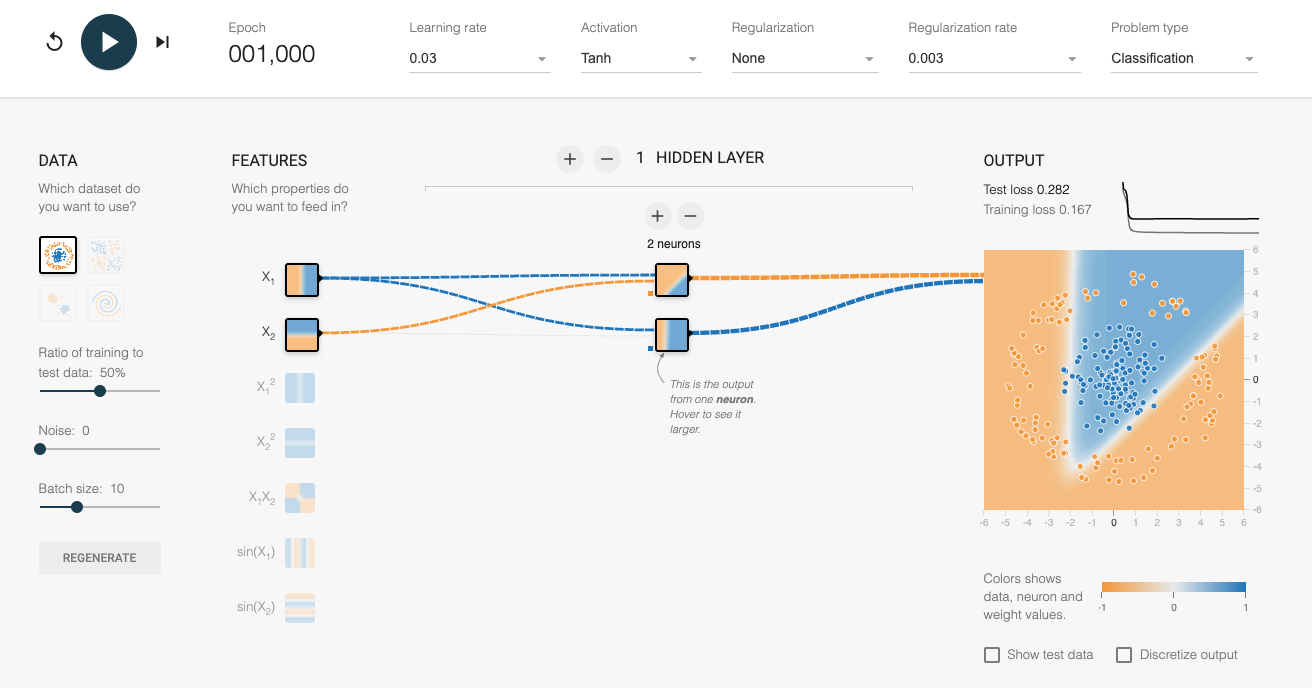

The network with two neurons and no regularization achieved a test loss of 0.282 and a training loss of 0.167. This relatively higher test loss suggests that the model may not be capturing the complexity of the dataset, potentially underfitting.

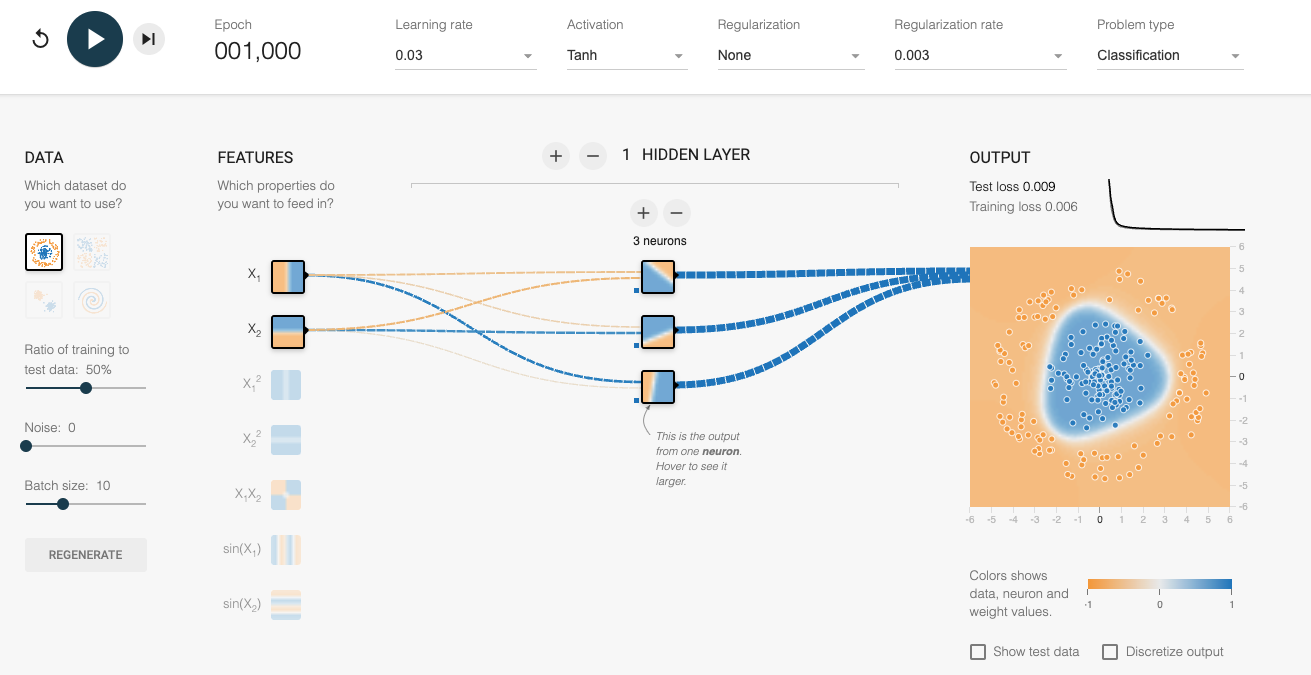

Increasing the neuron count to three without regularization significantly improved the test loss to 0.009 and the training loss to 0.006. The extra neuron helps the model better capture the circular pattern within the data, reducing both the training and test loss, and likely improving the model's generalization capability.


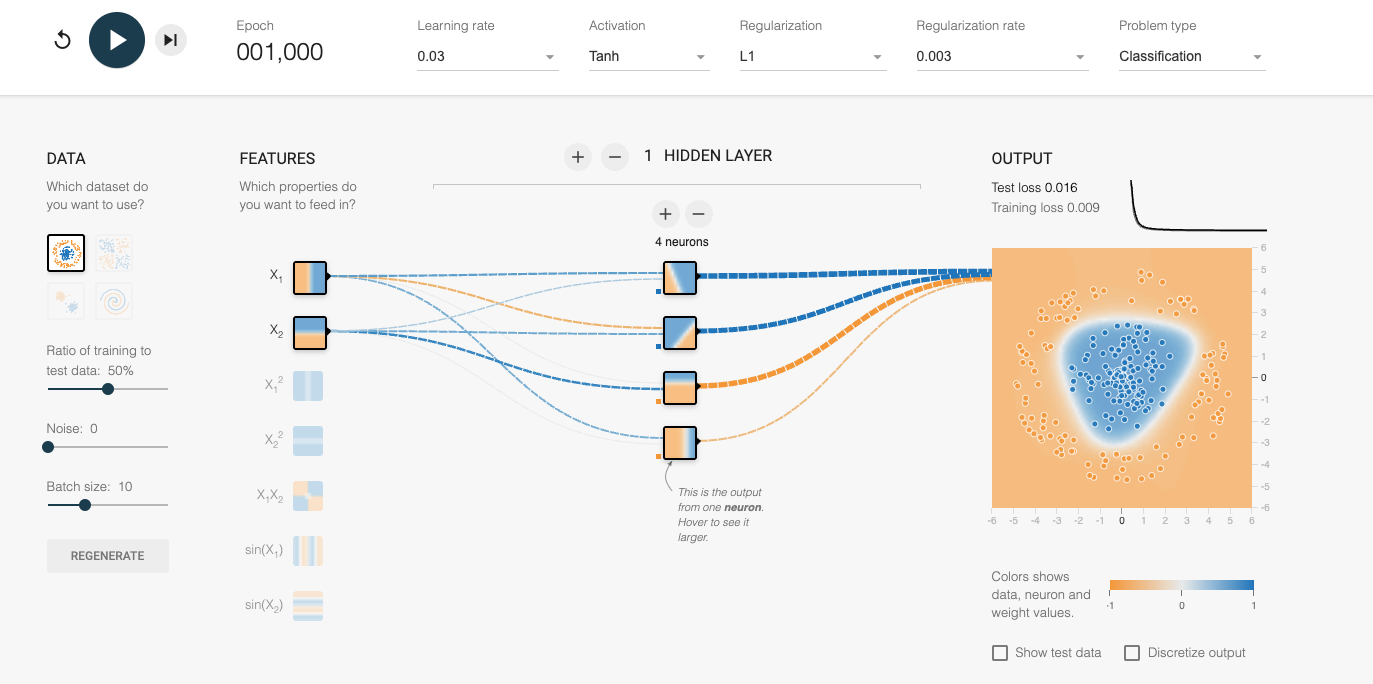

Introducing L1 regularization with four neurons resulted in a test loss of 0.016 and a training loss of 0.009. L1 regularization encourages sparsity in the network's weights, potentially nullifying the effect of some of the neurons. The test loss is slightly higher compared to the model with three neurons without regularization, which may indicate that while L1 has improved the model's generalization by penalizing complexity, the degree of regularization might be too strong, leading to a slight underfitting.


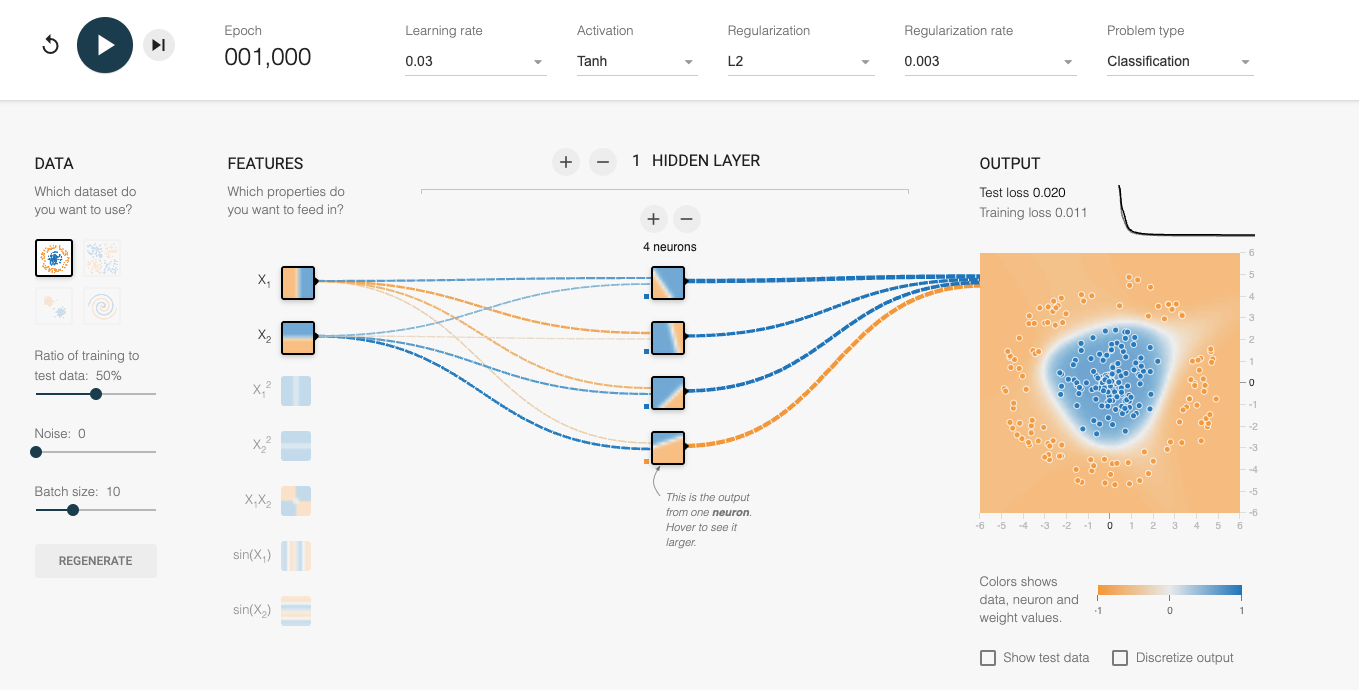

Applying L2 regularization with four neurons produced a test loss of 0.020 and a training loss of 0.011. L2 regularization penalizes the square of the weights, which tends to distribute the penalty more evenly and results in smaller but non-zero weights. The test loss here is higher than with the L1 regularization, suggesting that the L2 regularization may not be as effective in this case at combating overfitting or might be too lenient, allowing some overfitting compared to L1.

Summary 

• Model 1: 1 hidden layer, 2 nodes, no penelty, Test loss = 0.282 & Training loss = 0.167

• Model 2: 1 hidden layer, 3 nodes, no penelty, Test loss = 0.009 & Training loss = 0.006

• Model 3: 1 hidden layer, 4 nodes, l1 penelty, Test loss = 0.016 & Training loss = 0.009

• Model 4: 1 hidden layer, 4 nodes, l2 penelty, Test loss = 0.020 & Training loss = 0.011

The comparison indicates that for this specific dataset and network architecture, increasing the complexity of the model (more neurons) without regularization can improve performance to a point. Both L1 and L2 regularizations have increased the test loss compared to the three-neuron model without regularization, which could mean that the regularization strength (regularization rate) might need adjustment. L1 regularization led to a better test loss than L2 in this case, which could suggest that the feature selection property of L1 (due to its production of sparser solutions) might be more beneficial for this particular problem.

It is also important to note that the best regularization approach depends on the specific dataset and problem. Regularization techniques should be fine-tuned using techniques like cross-validation to find the optimal rate that minimizes overfitting without causing underfitting.

Now we have a better idea on how the effect that regularization would have on the neural network fitting. In `keras.layers.Dense()`, the parameter `activity_regularizer` would apply a penalty on the layer's output, which is summed into the loss function that the network optimizes. 

Below, we come back to a simple fully-connected neural network model `model_d`.

In [46]:
model_d= tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

### Task 7

Try to investigate two variants of `model_d`: 

* Adding a L1 activity regularization to the first two dense layers. 
* Adding a L2 activity regularization to the first two dense layers.

You may choose any reasonable regularization rate (for example, 0.001) as you like, but make sure the regularization rate is the same for the two variants. Train both `model_d` and the two models with different regularization on the training set and evaluate them on the test set. Remember to hold other parameters the same in order to make fair comparisons. Report both the training and testing loss/accuracy of the three models. Which model has the best performance on the test set?

In [47]:
model_d_l1= tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l1(0.001)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l1(0.001)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


model_d_l2= tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [36]:
# Compile settings
optimizer = 'adam'
loss = 'categorical_crossentropy'
metrics = ['accuracy']

# Compile the models with the same optimizer, loss, and metrics
model_d.compile(optimizer=optimizer, loss=loss, metrics=metrics)
model_d_l1.compile(optimizer=optimizer, loss=loss, metrics=metrics)
model_d_l2.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Fit the models
epochs = 10
batch_size = 32

print("Training model_d...")
history_d = model_d.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=2)

print("Training model_d_l1...")
history_d_l1 = model_d_l1.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=2)

print("Training model_d_l2...")
history_d_l2 = model_d_l2.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=2)

# Evaluate the models
print("Evaluating model_d...")
loss_d, accuracy_d = model_d.evaluate(x_test, y_test, verbose=2)
print(f"Loss: {loss_d}, Accuracy: {accuracy_d}")

print("Evaluating model_d_l1...")
loss_d_l1, accuracy_d_l1 = model_d_l1.evaluate(x_test, y_test, verbose=2)
print(f"Loss: {loss_d_l1}, Accuracy: {accuracy_d_l1}")

print("Evaluating model_d_l2...")
loss_d_l2, accuracy_d_l2 = model_d_l2.evaluate(x_test, y_test, verbose=2)
print(f"Loss: {loss_d_l2}, Accuracy: {accuracy_d_l2}")

Training model_d...
Epoch 1/10
1500/1500 - 2s - loss: 0.5146 - accuracy: 0.8141 - val_loss: 0.3962 - val_accuracy: 0.8544 - 2s/epoch - 1ms/step
Epoch 2/10
1500/1500 - 2s - loss: 0.3779 - accuracy: 0.8613 - val_loss: 0.4034 - val_accuracy: 0.8560 - 2s/epoch - 1ms/step
Epoch 3/10
1500/1500 - 2s - loss: 0.3420 - accuracy: 0.8735 - val_loss: 0.3409 - val_accuracy: 0.8759 - 2s/epoch - 1ms/step
Epoch 4/10
1500/1500 - 2s - loss: 0.3188 - accuracy: 0.8823 - val_loss: 0.3225 - val_accuracy: 0.8817 - 2s/epoch - 1ms/step
Epoch 5/10
1500/1500 - 2s - loss: 0.3010 - accuracy: 0.8878 - val_loss: 0.3278 - val_accuracy: 0.8830 - 2s/epoch - 1ms/step
Epoch 6/10
1500/1500 - 2s - loss: 0.2882 - accuracy: 0.8923 - val_loss: 0.3679 - val_accuracy: 0.8742 - 2s/epoch - 1ms/step
Epoch 7/10
1500/1500 - 2s - loss: 0.2765 - accuracy: 0.8961 - val_loss: 0.3333 - val_accuracy: 0.8835 - 2s/epoch - 1ms/step
Epoch 8/10
1500/1500 - 2s - loss: 0.2611 - accuracy: 0.9013 - val_loss: 0.3234 - val_accuracy: 0.8843 - 2s/epoch

Summary

• model_d: loss: 0.3546 - accuracy: 0.8858

• modek_d_l1: loss: 0.5802 - accuracy: 0.8410

• model_d_l2 loss: 0.5886 - accuracy: 0.8351

In this case adding a penalty makes the accuracy worse and there almost no different i accuarcy between l1 and l2 penalty 

#### Dropout

Dropout is a regularization technique for reducing overfitting in neural networks. The dropout rate, which is the proportion of neural network nodes that are randomly eliminated during training, is the hyperparameter that you can adjust. 

The optimal dropout rate may vary depending on the specific problem and model architecture, so it’s often beneficial to experiment with different values.

Again, let us investigate model `model_d`.

In [48]:
model_d= tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

### Task 8

Try to add an dropout layer to `model_d` before the final dense layer. Consider the following two types of layers:
* `keras.layers.Dropout`
* `keras.layers.GaussianDropout`
  
You may choose the any reasonable dropout rate (for example 0.2) as you wish, but keep the rate the same for the above two types of layers. Train both `model_d` and the two models with different dropout layers on the training set and evaluate them on the test set. Remember to hold other parameters the same in order to make fair comparisons. Report both the training and testing loss/accuracy of the three models. Which model has the best performance on the test set?

In [38]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, GaussianDropout

#Original model without dropout
model_d = tf.keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Model with standard dropout
model_d_dropout = tf.keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Model with Gaussian dropout
model_d_gaussian_dropout = tf.keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    GaussianDropout(0.2),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the models
optimizer = 'adam'
loss = 'categorical_crossentropy'
models = [model_d, model_d_dropout, model_d_gaussian_dropout]
for model in models:
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Train and evaluate each model
epochs = 10
batch_size = 32
for model in models:
    model_name = model.name
    print(f"Training {model_name}...")
    model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=2)
    print(f"Evaluating {model_name}...")
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print(f'{model_name} - Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}\n')

Training sequential_35...
Epoch 1/10
1500/1500 - 2s - loss: 0.5123 - accuracy: 0.8133 - val_loss: 0.4181 - val_accuracy: 0.8487 - 2s/epoch - 1ms/step
Epoch 2/10
1500/1500 - 2s - loss: 0.3836 - accuracy: 0.8584 - val_loss: 0.3804 - val_accuracy: 0.8597 - 2s/epoch - 1ms/step
Epoch 3/10
1500/1500 - 2s - loss: 0.3451 - accuracy: 0.8718 - val_loss: 0.4089 - val_accuracy: 0.8562 - 2s/epoch - 1ms/step
Epoch 4/10
1500/1500 - 2s - loss: 0.3217 - accuracy: 0.8804 - val_loss: 0.3661 - val_accuracy: 0.8662 - 2s/epoch - 1ms/step
Epoch 5/10
1500/1500 - 2s - loss: 0.3052 - accuracy: 0.8846 - val_loss: 0.3295 - val_accuracy: 0.8798 - 2s/epoch - 1ms/step
Epoch 6/10
1500/1500 - 2s - loss: 0.2882 - accuracy: 0.8924 - val_loss: 0.3470 - val_accuracy: 0.8748 - 2s/epoch - 1ms/step
Epoch 7/10
1500/1500 - 2s - loss: 0.2750 - accuracy: 0.8975 - val_loss: 0.3202 - val_accuracy: 0.8848 - 2s/epoch - 1ms/step
Epoch 8/10
1500/1500 - 2s - loss: 0.2666 - accuracy: 0.8997 - val_loss: 0.3541 - val_accuracy: 0.8792 - 2s

Summary 

• model_d: loss: 0.3686 - accuracy: 0.8715 - Test Loss: 0.3686, Test Accuracy: 0.8715

• model_d_dropout: loss: 0.3536 - accuracy: 0.8802 - Test Loss: 0.3686, Test Accuracy: 0.8715

• model_d_gaussian_dropout: loss: 0.3744 - accuracy: 0.8712 - Test Loss: 0.3744, Test Accuracy: 0.8712

The results from training three variants of a neural network model on the same dataset provide interesting insights into the effects of dropout as a regularization technique.

The original model model_d, without any dropout layers, achieved a test accuracy of 87.15% with a corresponding test loss of 0.3686. This sets a baseline for performance without any regularization through dropout.

Introducing a standard dropout layer in model_d_dropout led to a slight improvement in training accuracy, reaching 88.02%. However, the test accuracy remained the same as the original model at 87.15%, and the test loss was identical as well. This indicates that while the dropout layer may have contributed to a more robust training process by preventing co-adaptation of neurons, it did not translate to a noticeable improvement in generalization on the test data. This could be due to the dropout rate chosen, which may be either too low to cause a significant effect or the model may not be complex enough to benefit from dropout.

On the other hand, model_d_gaussian_dropout showed a marginal increase in test loss to 0.3744 while maintaining similar test accuracy to the original model at 87.12%. Gaussian Dropout, which not only drops out neurons but also adds multiplicative noise to the inputs of the remaining neurons, didn't seem to offer any advantage over the standard dropout or the original model without any dropout in this scenario.

In conclusion, neither standard nor Gaussian dropout led to improvements in test accuracy for these models. This could suggest that the base model was not significantly overfitting to the training data, to begin with, making the impact of these regularization techniques less pronounced. Additionally, it points towards the necessity of fine-tuning dropout rates and possibly considering other regularization techniques or model architectures to enhance model performance. Regularization techniques, such as dropout, are highly context-dependent and often require experimental tuning to determine their effectiveness for a particular dataset and model complexity.